In [1]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
directory = 'jobs/'
filemap_directory = 'jobs/'
filemap_filename = 'filemap'

iter_keyword = "Iteration "
loss_keyword = "loss = "
val_keyword = "detection_eval = "

In [3]:
def getFirstFloat(string, use_decimal):
	continue_search = True
	decimal_found = False
	end_of_first_float = 0
	
	while continue_search and end_of_first_float < len(string):
		char = string[end_of_first_float]
		if char.isdigit() or (char == "." and use_decimal and not decimal_found):
			if char == ".":
				decimal_found = True
			end_of_first_float += 1
		else:
			continue_search = False
	
	if end_of_first_float == 0:
		return "ERROR"
	return string[0:end_of_first_float]

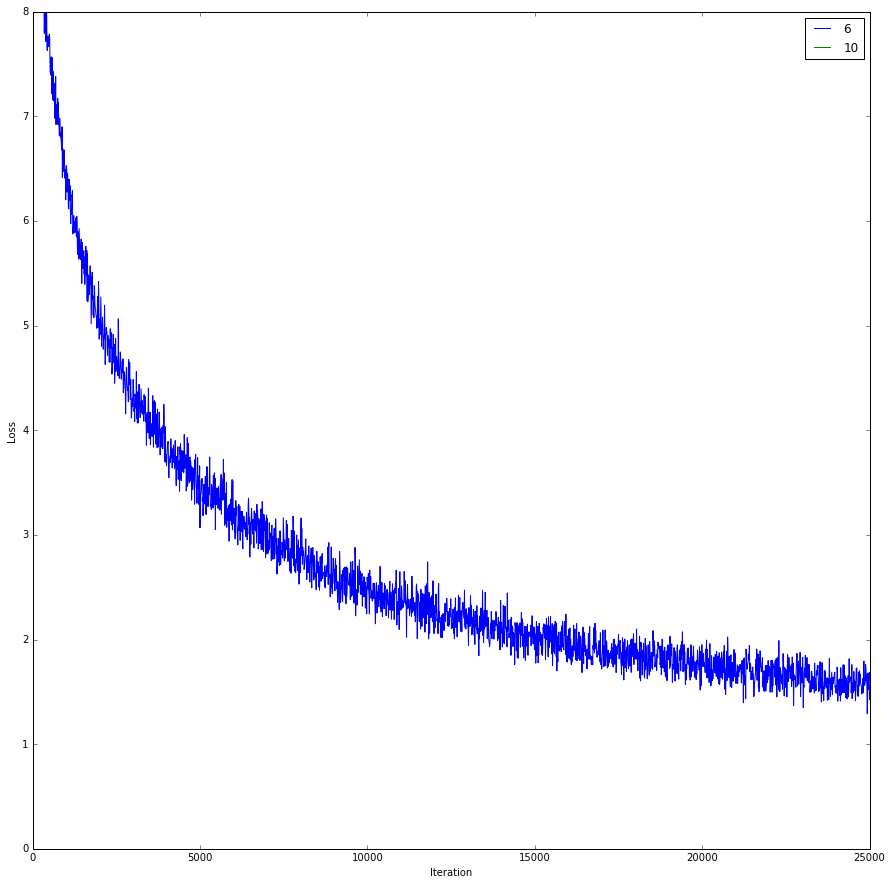

In [4]:

# get all log files in the directory
#files = os.listdir(osp.join(directory, '*.log'))
files = [filename for filename in listdir(directory) if isfile(join(directory, filename)) and filename[-4:] == ".log"]

filemap = {}
for i in xrange(len(files)):
	filemap[i] = {}
	filename = files[i]
	f = open(join(directory, filename), "r")
	
	loss_points_to_plot = []	# array of tuples (iter number, loss)
	val_points_to_plot = []		# array of tuples (iter number, validation accuracy)
	
	for line in f:
		# find position of any keywords
		iter_position = line.find(iter_keyword)
		loss_position = line.find(loss_keyword)
		val_position = line.find(val_keyword)
		
		# find the loss values if applicable
		if iter_position > -1 and loss_position > -1:
			iter_num = getFirstFloat(line[iter_position + len(iter_keyword):], False)
			loss_val = getFirstFloat(line[loss_position + len(loss_keyword):], True)
			if iter_num != "ERROR" and loss_val != "ERROR":
				loss_points_to_plot.append((iter_num, loss_val))
			#else:
				#print "LOSS ERROR: " + str(line)
		
		# find the validation accuracy if applicable
		if val_position > -1:
			val_num = getFirstFloat(line[val_position + len(val_keyword):], True)
			if val_num != "ERROR":
				val_points_to_plot.append(((len(val_points_to_plot) + 1) * 1000, val_num))
			else:
				print "VAL ERROR: " + str(line)

	# store down important values for the file
	filemap[i]["filename"] = filename
	filemap[i]["loss"] = loss_points_to_plot
	filemap[i]["val"] = val_points_to_plot

# plot Loss

ids = [6, 10]
for id_num in ids:
#for id_num in filemap:
	loss_points_to_plot = filemap[id_num]["loss"]
	plt.plot([x[0] for x in loss_points_to_plot], [x[1] for x in loss_points_to_plot], label=str(id_num))
	
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Iteration')
x1,x2,y1,y2 = plt.axis()

# Change ranges here
plt.axis((x1,x2,0,8))
plt.show()




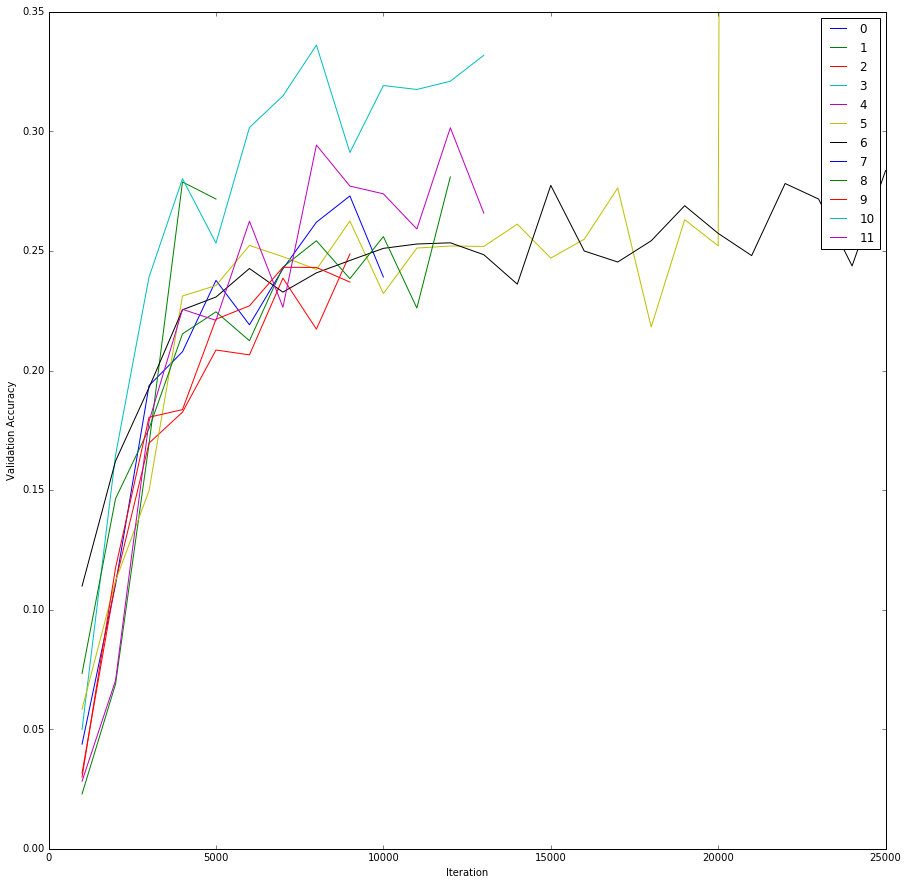

In [5]:
# plot Validation Accuracy
for id_num in filemap:
	loss_points_to_plot = filemap[id_num]["val"]
	plt.plot([x[0] for x in loss_points_to_plot], [x[1] for x in loss_points_to_plot], label=str(id_num))
	
plt.legend()
plt.ylabel('Validation Accuracy')
plt.xlabel('Iteration')
x1,x2,y1,y2 = plt.axis()

# change ranges here
plt.axis((x1,x2,0,0.35))
plt.show()

# save the filemap
f = open(join(filemap_directory, filemap_filename), 'w')
for id_num in filemap:
	f.write(str(id_num) + ": " + filemap[id_num]["filename"] + "\n")
f.close()

In [6]:
filemap[6]['val']

[(1000, '0.109875'),
 (2000, '0.162131'),
 (3000, '0.192859'),
 (4000, '0.225397'),
 (5000, '0.230731'),
 (6000, '0.242651'),
 (7000, '0.23278'),
 (8000, '0.240833'),
 (9000, '0.246012'),
 (10000, '0.251083'),
 (11000, '0.252897'),
 (12000, '0.253402'),
 (13000, '0.248423'),
 (14000, '0.236124'),
 (15000, '0.277419'),
 (16000, '0.249979'),
 (17000, '0.245371'),
 (18000, '0.254254'),
 (19000, '0.268916'),
 (20000, '0.257345'),
 (21000, '0.248047'),
 (22000, '0.278191'),
 (23000, '0.271705'),
 (24000, '0.243734'),
 (25000, '0.283582')]

In [7]:
filemap[5]['filename']

'VGG_Pascal3D_SSD_share_pose_bins=8_diff=True_numPascal=5_size=300_lr=0.000040.log'

In [8]:
for idx, obj in filemap.iteritems():
    print idx 
    print obj['filename']

0
VGG_Pascal3D_SSD_share_pose_bins=8_diff=False_numPascal=5_size=300_lr=0.000040_samp=True.log
1
VGG_Pascal3D_SSD_share_pose_bins=4_diff=False_numPascal=5_size=300_lr=0.000040_samp=False.log
2
VGG_Pascal3D_SSD_share_pose_bins=8_diff=False_numPascal=4_size=300_lr=0.000040.log
3
VGG_Pascal3D_SSD_share_pose_bins=4_diff=True_numPascal=5_size=300_lr=0.000040_samp=False.log
4
VGG_Pascal3D_SSD_share_pose_bins=8_diff=False_numPascal=5_size=500_lr=0.000040_samp=False.log
5
VGG_Pascal3D_SSD_share_pose_bins=8_diff=True_numPascal=5_size=300_lr=0.000040.log
6
VGG_Pascal3D_SSD_share_pose_bins=8_diff=False_numPascal=5_size=300_lr=0.000040.log
7
VGG_Pascal3D_SSD_share_pose_bins=4_diff=False_numPascal=6_size=300_lr=0.000040_samp=True.log
8
VGG_Pascal3D_SSD_share_pose_bins=8_diff=True_numPascal=4_size=300_lr=0.000040.log
9
VGG_Pascal3D_SSD_share_pose_bins=8_diff=True_numPascal=5_size=300_lr=0.000040_samp=True.log
10
VGG_Pascal3D_SSD_share_pose_bins=8_diff=True_numPascal=4_size=500_lr=0.000040_samp=False

In [13]:
filemap[11]['val']

[(1000, '0.0282525'),
 (2000, '0.0703581'),
 (3000, '0.17871'),
 (4000, '0.225584'),
 (5000, '0.220962'),
 (6000, '0.262434'),
 (7000, '0.226462'),
 (8000, '0.294285'),
 (9000, '0.27712'),
 (10000, '0.273882'),
 (11000, '0.259178'),
 (12000, '0.301509'),
 (13000, '0.265802')]

In [10]:
filemap[6]['val']

[(1000, '0.109875'),
 (2000, '0.162131'),
 (3000, '0.192859'),
 (4000, '0.225397'),
 (5000, '0.230731'),
 (6000, '0.242651'),
 (7000, '0.23278'),
 (8000, '0.240833'),
 (9000, '0.246012'),
 (10000, '0.251083'),
 (11000, '0.252897'),
 (12000, '0.253402'),
 (13000, '0.248423'),
 (14000, '0.236124'),
 (15000, '0.277419'),
 (16000, '0.249979'),
 (17000, '0.245371'),
 (18000, '0.254254'),
 (19000, '0.268916'),
 (20000, '0.257345'),
 (21000, '0.248047'),
 (22000, '0.278191'),
 (23000, '0.271705'),
 (24000, '0.243734'),
 (25000, '0.283582')]

In [11]:
filemap[1]['val']

[(1000, '0.0229331'),
 (2000, '0.0688631'),
 (3000, '0.169179'),
 (4000, '0.27885'),
 (5000, '0.271709')]

In [12]:
filemap[3]['val']

[(1000, '0.0499052'),
 (2000, '0.164604'),
 (3000, '0.239039'),
 (4000, '0.280207'),
 (5000, '0.253272'),
 (6000, '0.301627'),
 (7000, '0.314826'),
 (8000, '0.336091'),
 (9000, '0.291166'),
 (10000, '0.319176'),
 (11000, '0.317519'),
 (12000, '0.320973'),
 (13000, '0.331819')]